# 無限関係モデルによる共クラスタリングの実験用のトイデータ生成
---

クラスタ数は『続・わかりやすいパターン認識』の13章P.279のデータと揃えてある．
ただし，関係行列の行数・列数は比率はそのままで数を10倍に増やしてる．

In [1]:
using Distributions
using Plots

using DelimitedFiles

行（顧客）と列（商品）のクラスタ数$c_1$, $c_2$

In [2]:
c1 = 4;
c2 = 3;

行（顧客）と列（商品）のデータ数$K$, $L$

In [3]:
K = 15 * 10;
L = 10 * 10;

行（顧客）と列（商品）の混合比率$\pi^1$, $\pi^2$

In [4]:
π1 = [4/15; 3/15; 5/15; 3/15];
π2 = [4/10; 3/10; 3/10];

行列$\Theta = \{\theta_ij\}$の各成分は，
顧客クラスタ$i$に属する顧客が商品クラスタ$j$に属する商品を購入する確率を表す．

In [5]:
Θ = [0.2 0.9 0.1;
     1.0 0.8 0.0;
     0.1 0.1 0.9;
     0.2 0.7 0.1];

顧客と商品の所属クラスを表す潜在変数$\mathbf s^1$, $\mathbf s^2$

In [6]:
s1 = rand(Categorical(π1), K);
s2 = rand(Categorical(π2), L);

顧客$k$が商品$l$を購入してたら1，そうでなければ0を成分にもつ
関係行列$\mathbf R = \{R_{kl}\}$

In [7]:
R = zeros(K, L);

for k in 1:K
    for l in 1:L
        R[k, l] = rand(Bernoulli(Θ[s1[k], s2[l]]))
    end
end

顧客と商品の関係行列$\mathbf R$をプロット

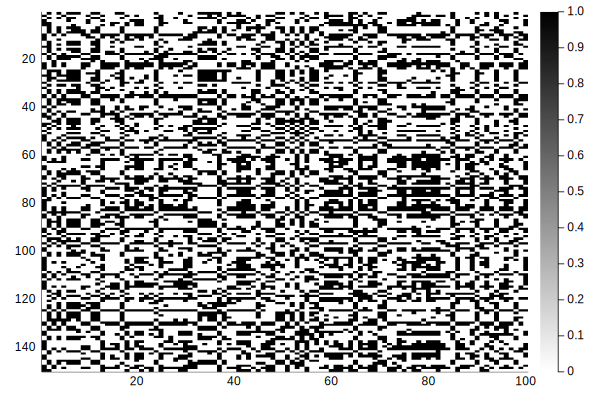

In [8]:
heatmap(R, yflip=true, c=ColorGradient([:white, :black]))

顧客と商品の関係行列$\mathbf R$を真のラベルを用いて並べ替えて表示する

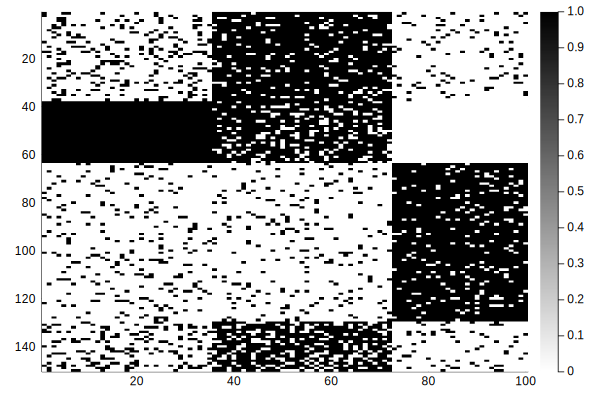

In [9]:
row_idxs = sort(collect(1:K), by=i->s1[i]);
col_idxs = sort(collect(1:L), by=i->s2[i]);

heatmap(R[row_idxs, col_idxs], yflip=true, c=ColorGradient([:white, :black]))

# データの出力

https://stackoverflow.com/questions/52900232/export-an-array-to-csv-file-in-julia

In [10]:
writedlm("IRM_toydata_R_200402.csv", R, ',')
writedlm("IRM_toydata_s1_200402.csv", s1, ',')
writedlm("IRM_toydata_s2_200402.csv", s2, ',')

以下，出力したデータを読み込むテスト

In [11]:
R_gt = readdlm("IRM_toydata_R_200402.csv", ',');
s1_gt = readdlm("IRM_toydata_s1_200402.csv", ',');
s2_gt = readdlm("IRM_toydata_s2_200402.csv", ',');

In [14]:
row_idxs = sort(collect(1:K), by=i->s1_gt[i]);
col_idxs = sort(collect(1:L), by=i->s2_gt[i]);

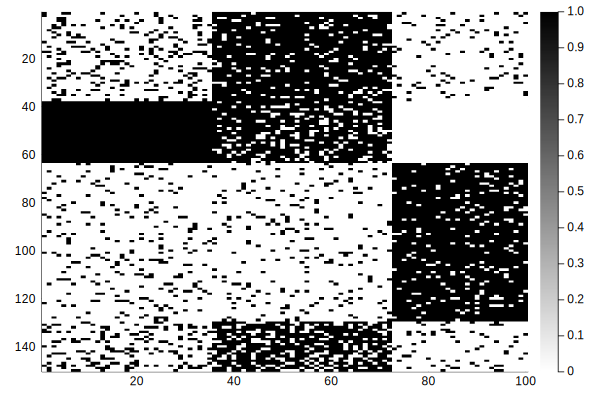

In [15]:
heatmap(R_gt[row_idxs, col_idxs], yflip=true, c=ColorGradient([:white, :black]))